   X   Y
0  1   4
1  2   6
2  3   9
3  4  11
4  5  18


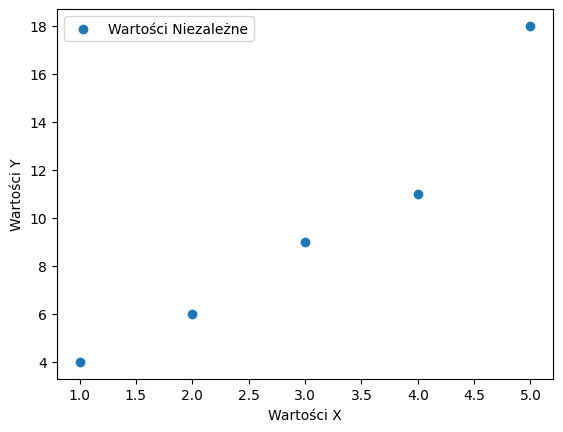

Średnia x:  3.0
Średnia y:  9.6

Odchylenie standardowe x:  1.5811388300841898
Odchylenie standardowe y:  5.412947441089743

Odchylenie standardowe obliczone z numpy dla x i y:  1.4142135623730951 4.841487374764082

n =  5

      X   Y   y2   xy  x2
0     1   4   16    4   1
1     2   6   36   12   4
2     3   9   81   27   9
3     4  11  121   44  16
4     5  18  324   90  25
sum  15  48  578  177  55

r =  0.963940292431027

Pearson z biblioteki scipy:  0.963940292431027
b =  3.3000000000000003
a =  -0.3000000000000007


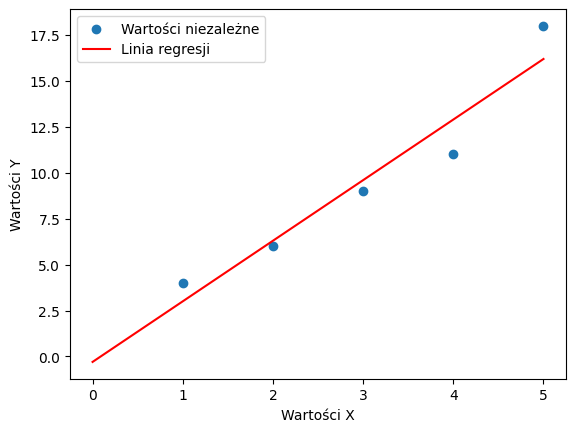

AttributeError: 'DataFrame' object has no attribute 'append'

In [57]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy


df = pd.DataFrame()
df['X'] = [1, 2, 3, 4, 5]
x = df['X']
df['Y'] = [4, 6, 9, 11, 18]
y = df['Y']
print(df)
plt.scatter(df['X'], df['Y'], label='Wartości Niezależne')
plt.xlabel('Wartości X')
plt.ylabel('Wartości Y')
plt.legend()
plt.show()

def srednia(wartosci):
    return sum(wartosci) / len(wartosci)

Mean_x = srednia(df['X'])
Mean_y = srednia(df['Y'])

print("Średnia x: ", Mean_x)
print("Średnia y: ", Mean_y)

def odchylenie(wartosci):
    n = len(wartosci)
    if n < 2:
        return 0.0
    mean, sd = srednia(wartosci), 0.0
    for wartosc in wartosci:
        sd += (float(wartosc) - mean) ** 2
    sd = math.sqrt(sd / float(n - 1))
    return sd

Sx = odchylenie(df['X'])
Sy = odchylenie(df['Y'])

print("")
print("Odchylenie standardowe x: ", Sx)
print("Odchylenie standardowe y: ", Sy)

Sx_numpy = np.std(df['X'])
Sy_numpy = np.std(df['Y'])
print("")
print("Odchylenie standardowe obliczone z numpy dla x i y: ", Sx_numpy, Sy_numpy)

n = len(df['X'])
pearson = pd.DataFrame(df[:])
pearson['y2'] = df['Y'] * df['Y']
pearson['xy'] = df['X'] * df['Y']
pearson['x2'] = df['X'] * df['X']
pearson['y2'] = df['Y'] * df['Y']
pearson.loc['sum'] = pearson.sum()
print("")
print("n = ", n)
print()
print(pearson)

def wsp_korelacji_pearsona(wartosci):
    # n = len(df)
    # pearson = pd.DataFrame(df[:])
    # pearson['y2'] = df['Y'] * df['Y']
    # pearson['xy'] = df['X'] * df['Y']
    # pearson['x2'] = df['X'] * df['X']
    # pearson.loc['sum'] = pearson.sum()

    licznik = n * pearson['xy']['sum'] - pearson['X']['sum'] * pearson['Y']['sum']
    mianownik = math.sqrt((n * pearson['x2']['sum'] - pearson['X']['sum'] ** 2) * (n * pearson['y2']['sum'] - pearson['Y']['sum'] ** 2))
    r = licznik / mianownik
    return r

person_result = wsp_korelacji_pearsona(df[:])
print("")
print("r = ", person_result)

pearson_scipy = scipy.stats.pearsonr(df['X'], df['Y'])
print("")
print("Pearson z biblioteki scipy: ", pearson_scipy[0])


b = person_result * Sy/Sx
a = srednia(y) - b * srednia(x)
print("b = ", b)
print("a = ", a)

def linia_regresji(x):
    return (b * x) + a

x = np.linspace(0, 5, 1000)
plt.scatter(df['X'], df['Y'], label="Wartości niezależne")
plt.plot(x, linia_regresji(x), 'r', label='Linia regresji')
plt.xlabel('Wartości X')
plt.ylabel('Wartości Y')
plt.legend()
plt.show()

def predict_y(df, x):
    r = wsp_korelacji_pearsona(x)
    Sx = odchylenie(x)
    Sy = odchylenie(y)
    Mx = srednia(x)
    My = srednia(y)
    b = r * Sy/Sx
    a = My - b * Mx
    return b * x + a

df = df.append({'X': 6, 'Y': predict_y(df, 6)}, ignore_index=True)
df = df.append({'X': 7, 'Y': predict_y(df, 7)}, ignore_index=True)
df



